In [56]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [57]:
TRAIN_DATA_PATH = "/Users/bpakra200/AiEdge/AutoML/data/train.csv"

In [58]:

df_train = pd.read_csv(TRAIN_DATA_PATH)

In [59]:
df_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,66452282,71178019,17650,17650,17650.0,36 months,10.64,574.84,B,B4,Production Manager,5 years,RENT,65000.0,Verified,01-12-2015,n,NaN,debt_consolidation,Debt consolidation,852xx,AZ,15.25,0,01-12-2005,0,41.0,40.0,6,1,2970,60.6,21,f,17231.66,17231.66,564.41,564.41,418.34,146.07,0.0,0.0,0.0,01-01-2016,574.84,01-02-2016,01-01-2016,0.0,41.0,1,INDIVIDUAL,NaN,NaN,NaN,0,3000.0,29035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.0,NaN,NaN,NaN,0
1,51848225,55277975,8000,8000,8000.0,36 months,9.99,258.10,B,B3,NaN,NaN,MORTGAGE,53544.0,Verified,01-07-2015,n,NaN,home_improvement,Home improvement,775xx,TX,2.89,0,01-02-1986,0,NaN,NaN,2,0,2134,22.7,11,w,6826.82,6826.82,1539.72,1539.72,1173.18,366.54,0.0,0.0,0.0,01-01-2016,258.10,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,556.0,2134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9400.0,NaN,NaN,NaN,0
2,50879344,54259059,7000,7000,7000.0,36 months,7.89,219.00,A,A5,Manager,2 years,RENT,40000.0,Verified,01-06-2015,n,NaN,credit_card,Credit card refinancing,109xx,NY,8.67,0,01-01-2008,0,NaN,NaN,2,0,623,77.9,4,w,5765.03,5765.03,1529.93,1529.93,1234.97,294.96,0.0,0.0,0.0,01-01-2016,219.00,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,1583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,0
3,12845721,14867879,21000,21000,21000.0,60 months,15.61,506.34,D,D1,Associate,1 year,MORTGAGE,80000.0,Verified,01-07-2014,n,NaN,debt_consolidation,Debt consolidation,301xx,GA,21.77,0,01-08-2004,0,26.0,NaN,8,0,18356,95.6,10,w,16595.60,16595.60,8607.78,8607.78,4404.40,4203.38,0.0,0.0,0.0,01-01-2016,506.34,01-01-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,250069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19200.0,NaN,NaN,NaN,0
4,37721855,40444897,15000,15000,15000.0,36 months,12.99,505.34,C,C2,Manager,< 1 year,OWN,40000.0,Source Verified,01-01-2015,n,NaN,debt_consolidation,Debt consolidation,995xx,AK,24.10,0,01-10-2005,0,NaN,NaN,8,0,22831,71.3,10,f,10630.33,10630.33,6042.43,6042.43,4369.67,1672.76,0.0,0.0,0.0,01-01-2016,505.34,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,29037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32000.0,NaN,NaN,NaN,0


In [60]:
df_train.shape

(641976, 73)

<h1>Missing Value Detection and Imputation</h1>

In [61]:
is_null_vec = df_train.isnull().sum()*100/df_train.shape[0]
is_null_vec

id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
                      ...    
total_rev_hi_lim     7.858393
inq_fi              98.434988
total_cu_tl         98.434988
inq_last_12m        98.434988
default_ind          0.000000
Length: 73, dtype: float64

date_of_last_rech_data_6    73.889205
date_of_last_rech_data_7    73.086111
date_of_last_rech_data_8    72.014560
date_of_last_rech_data_9    72.171539
total_rech_data_6           73.889205
total_rech_data_7           73.086111
total_rech_data_8           72.014560
total_rech_data_9           72.171539
max_rech_data_6             73.889205
max_rech_data_7             73.086111
max_rech_data_8             72.014560
max_rech_data_9             72.171539
count_rech_2g_6             73.889205
count_rech_2g_7             73.086111
count_rech_2g_8             72.014560
count_rech_2g_9             72.171539
count_rech_3g_6             73.889205
count_rech_3g_7             73.086111
count_rech_3g_8             72.014560
count_rech_3g_9             72.171539
av_rech_amt_data_6          73.889205
av_rech_amt_data_7          73.086111
av_rech_amt_data_8          72.014560
av_rech_amt_data_9          72.171539
arpu_3g_6                   73.889205
arpu_3g_7                   73.086111
arpu_3g_8   

date_of_last_rech_data_6    73.889205
date_of_last_rech_data_7    73.086111
date_of_last_rech_data_8    72.014560
date_of_last_rech_data_9    72.171539
total_rech_data_6           73.889205
total_rech_data_7           73.086111
total_rech_data_8           72.014560
total_rech_data_9           72.171539
max_rech_data_6             73.889205
max_rech_data_7             73.086111
max_rech_data_8             72.014560
max_rech_data_9             72.171539
count_rech_2g_6             73.889205
count_rech_2g_7             73.086111
count_rech_2g_8             72.014560
count_rech_2g_9             72.171539
count_rech_3g_6             73.889205
count_rech_3g_7             73.086111
count_rech_3g_8             72.014560
count_rech_3g_9             72.171539
av_rech_amt_data_6          73.889205
av_rech_amt_data_7          73.086111
av_rech_amt_data_8          72.014560
av_rech_amt_data_9          72.171539
arpu_3g_6                   73.889205
arpu_3g_7                   73.086111
arpu_3g_8   

In [62]:
# Let us identify columns in which the missing value   less than 5% of the data, we can simply 
# remove the rows for them
rem_rows_col_list = is_null_vec[np.logical_and(is_null_vec < 5, is_null_vec > 0)].index.tolist()
rem_rows_col_list

['title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med']

## Ideally  We can remove rows of the column where missing value is less then 5% . But we will keep it as We will use XGboost

## Identify column where missing value is more than 80%

In [63]:
is_null_vec[is_null_vec > 80]


desc                         85.758035
mths_since_last_record       84.670143
annual_inc_joint             99.949998
dti_joint                    99.949998
verification_status_joint    99.949998
open_acc_6m                  98.434988
open_il_6m                   98.434988
open_il_12m                  98.434988
open_il_24m                  98.434988
mths_since_rcnt_il           98.473619
total_bal_il                 98.434988
il_util                      98.627675
open_rv_12m                  98.434988
open_rv_24m                  98.434988
max_bal_bc                   98.434988
all_util                     98.434988
inq_fi                       98.434988
total_cu_tl                  98.434988
inq_last_12m                 98.434988
dtype: float64

## droping column where missing value is more than 80%

In [64]:
df_train.drop(["desc","mths_since_last_record",
           "annual_inc_joint","dti_joint","verification_status_joint","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m"], axis = 1, inplace = True)

In [65]:
df_train.shape

(641976, 54)

In [66]:
# Pattern Detection for randomvalues
#uSing missingno package
import missingno as msno

<Axes: >

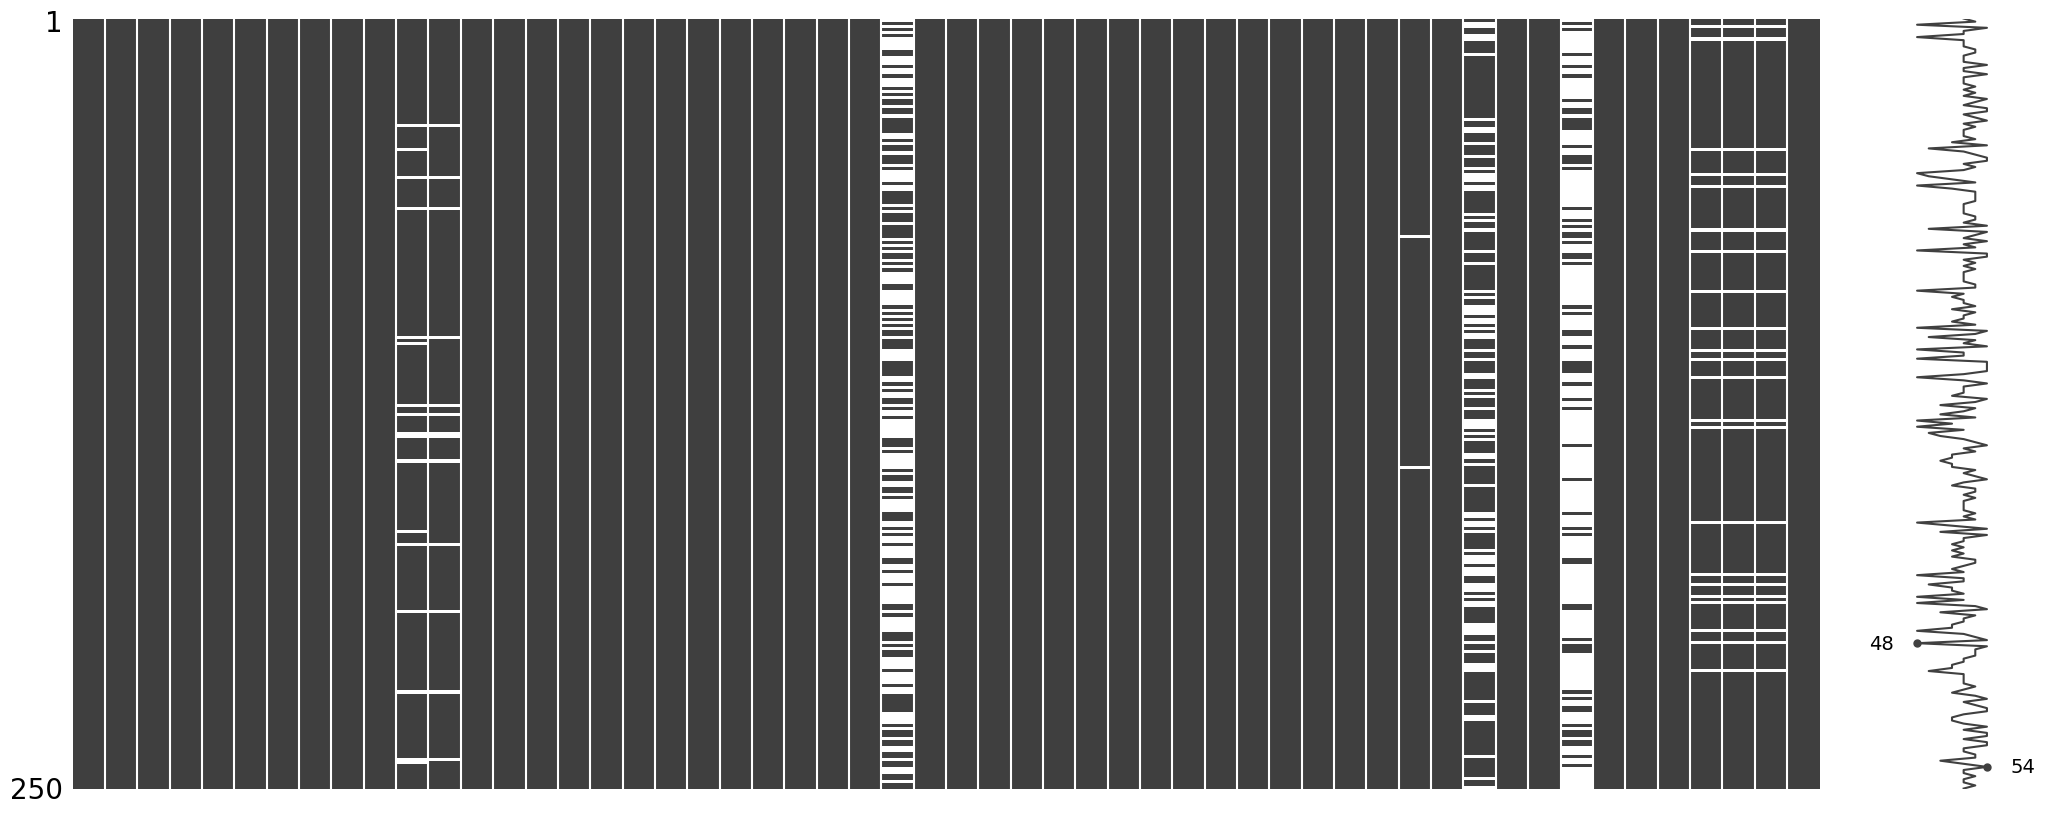

In [67]:
%matplotlib inline
msno.matrix(df_train.sample(250)) 

# The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of 
# one variable affects the presence of another:


<Axes: >

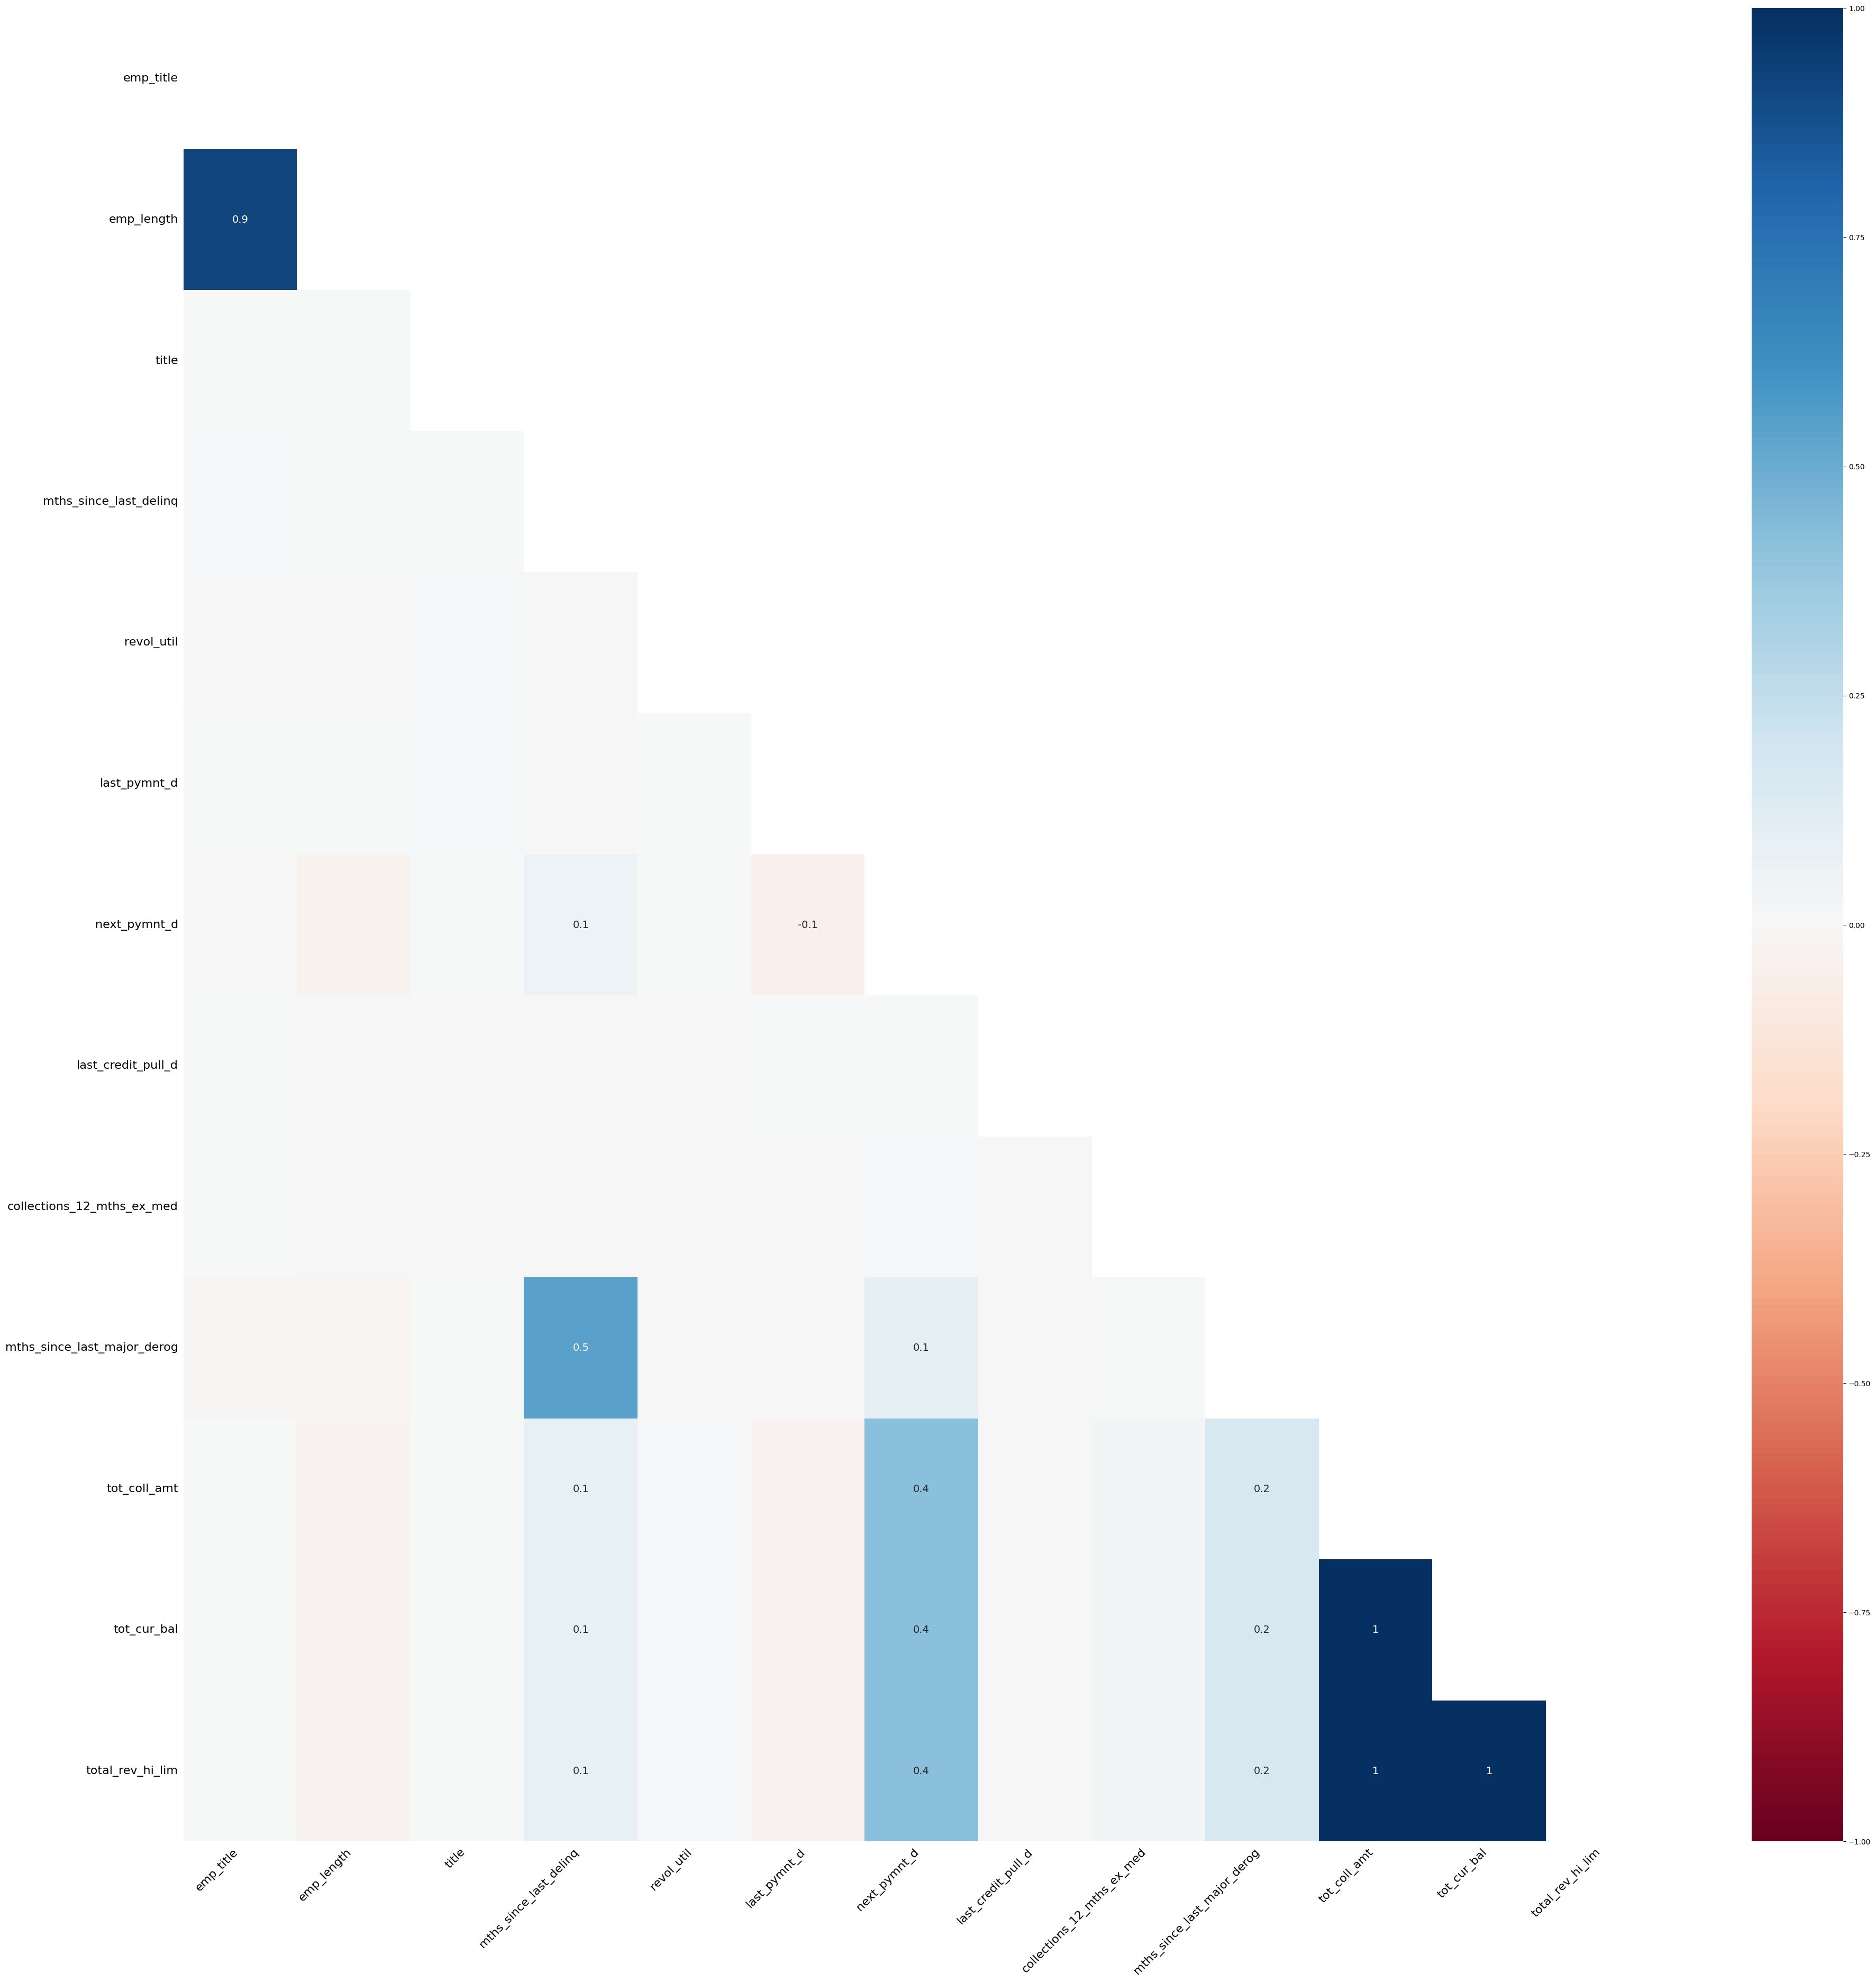

In [68]:
msno.heatmap(df_train, figsize=(45, 45))

<Axes: >

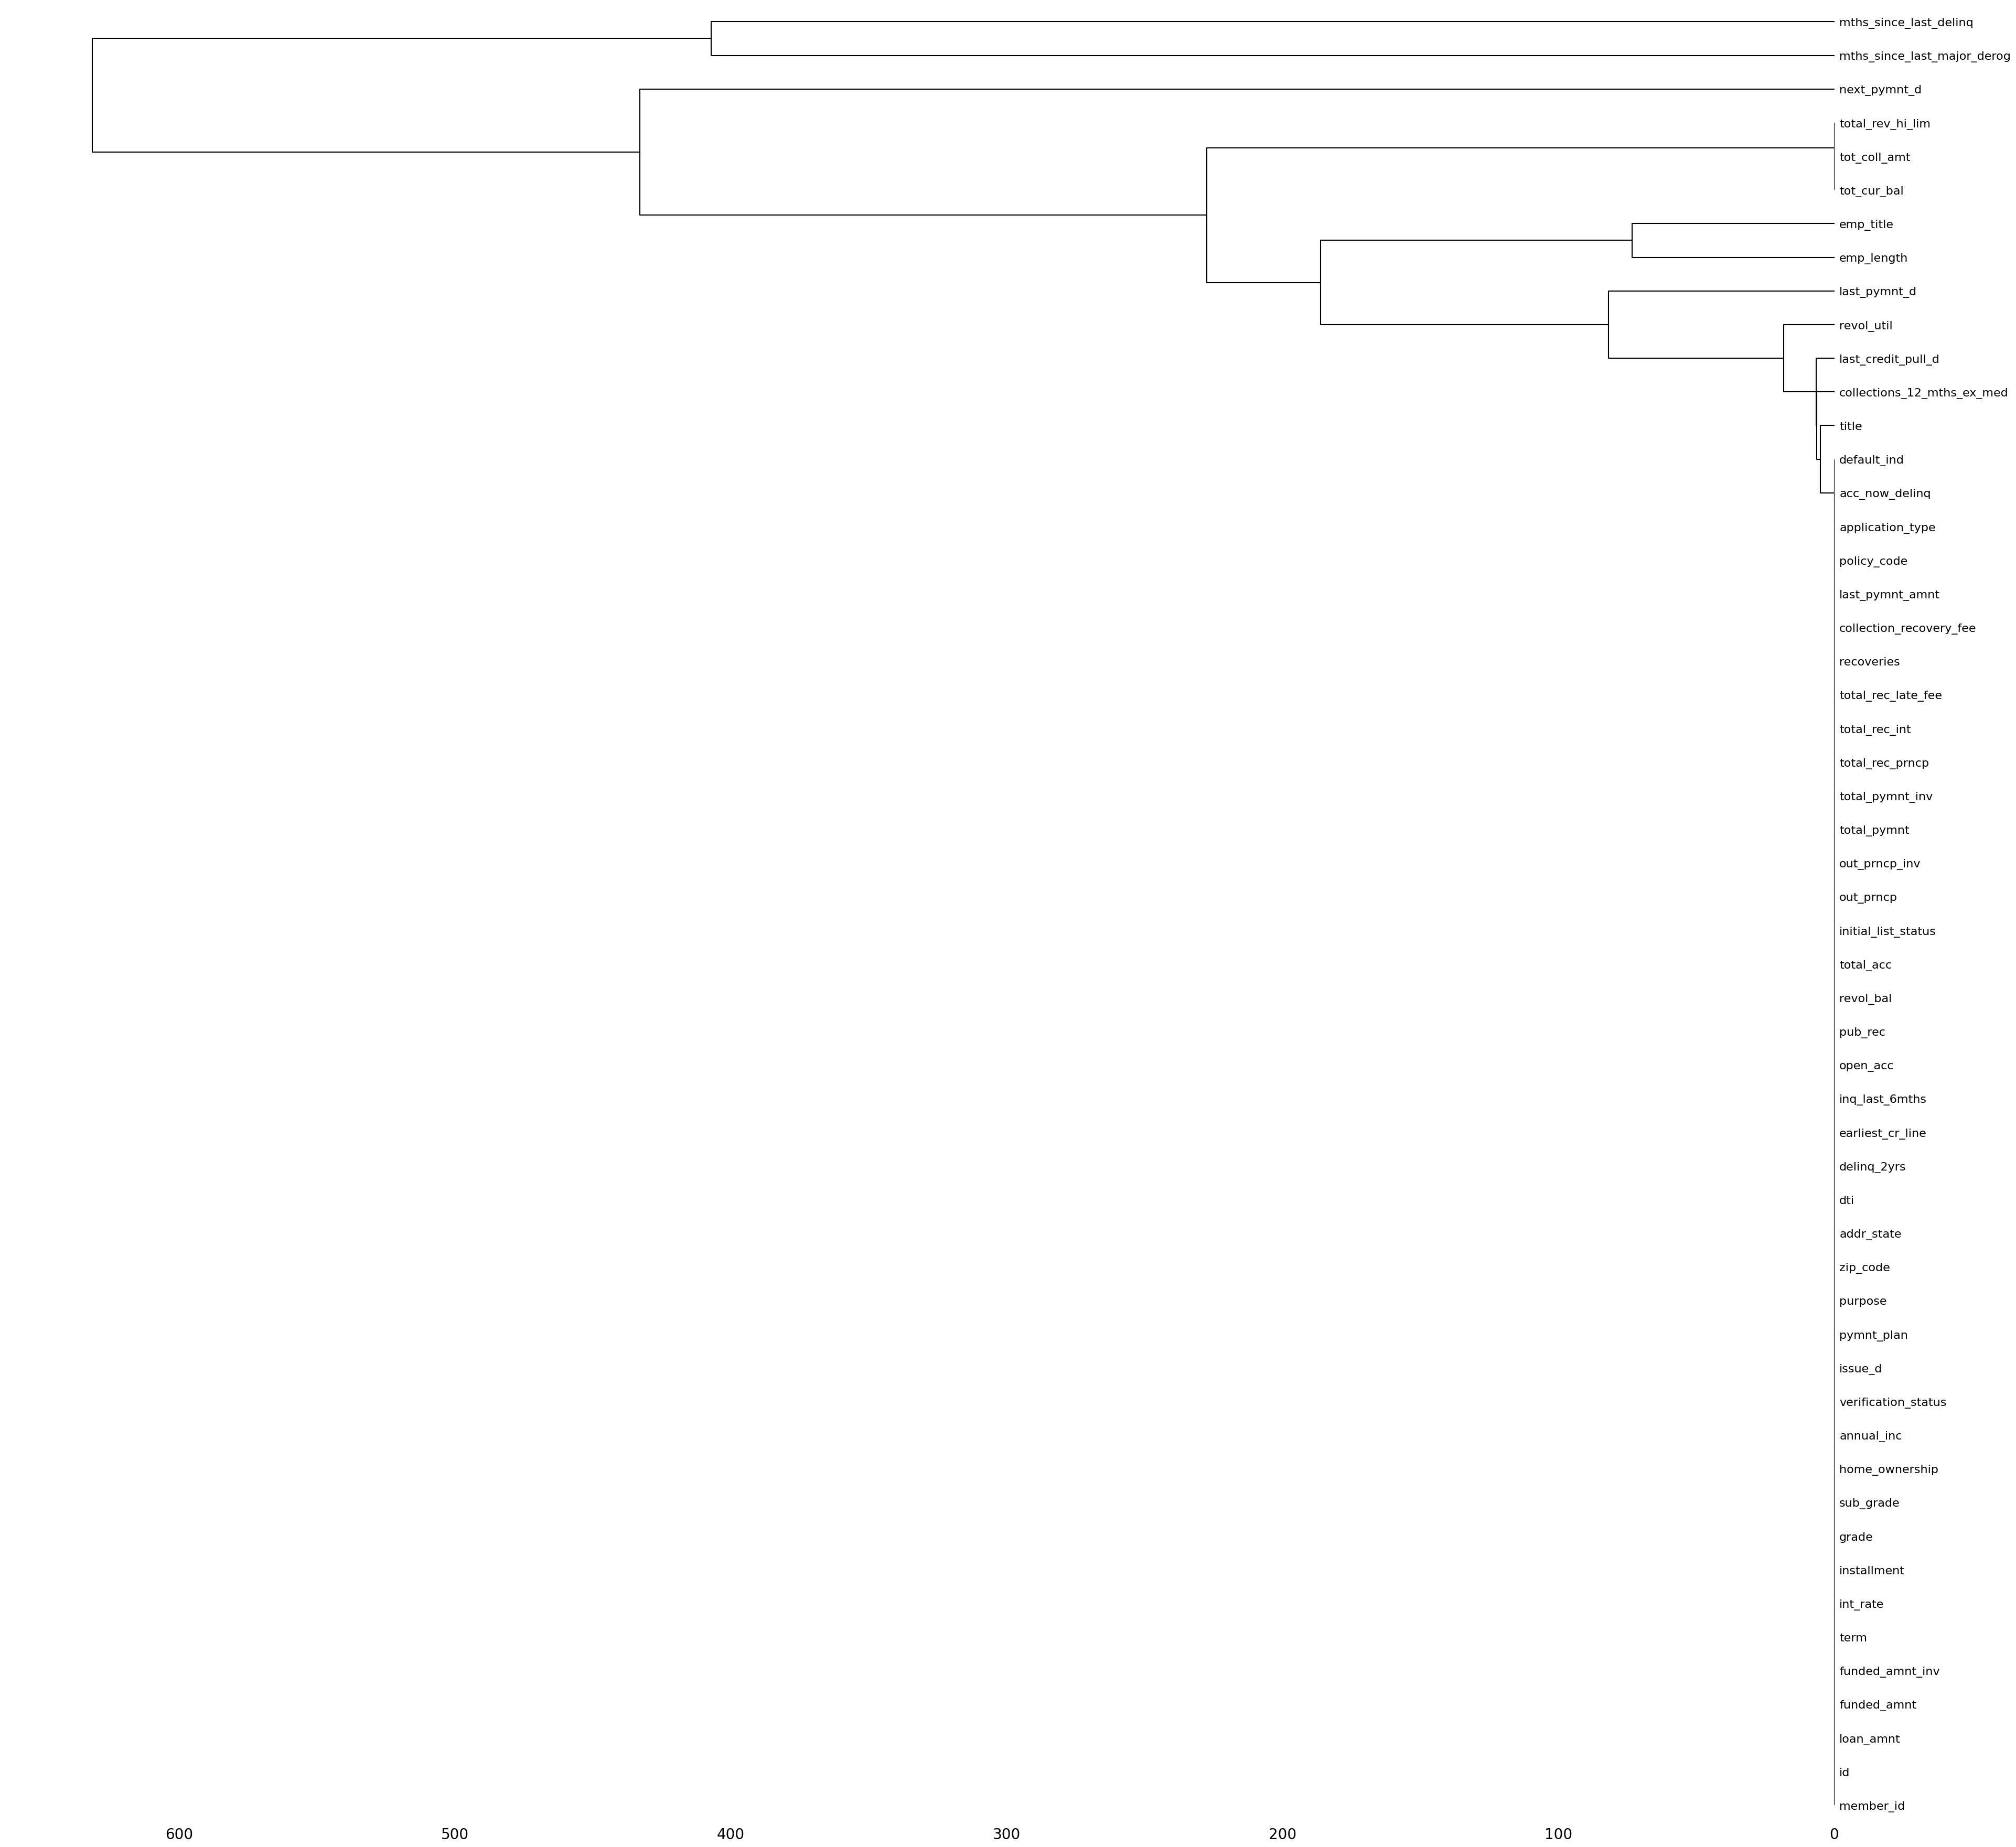

In [69]:
msno.dendrogram(df_train,figsize=(45, 45))

<Axes: >

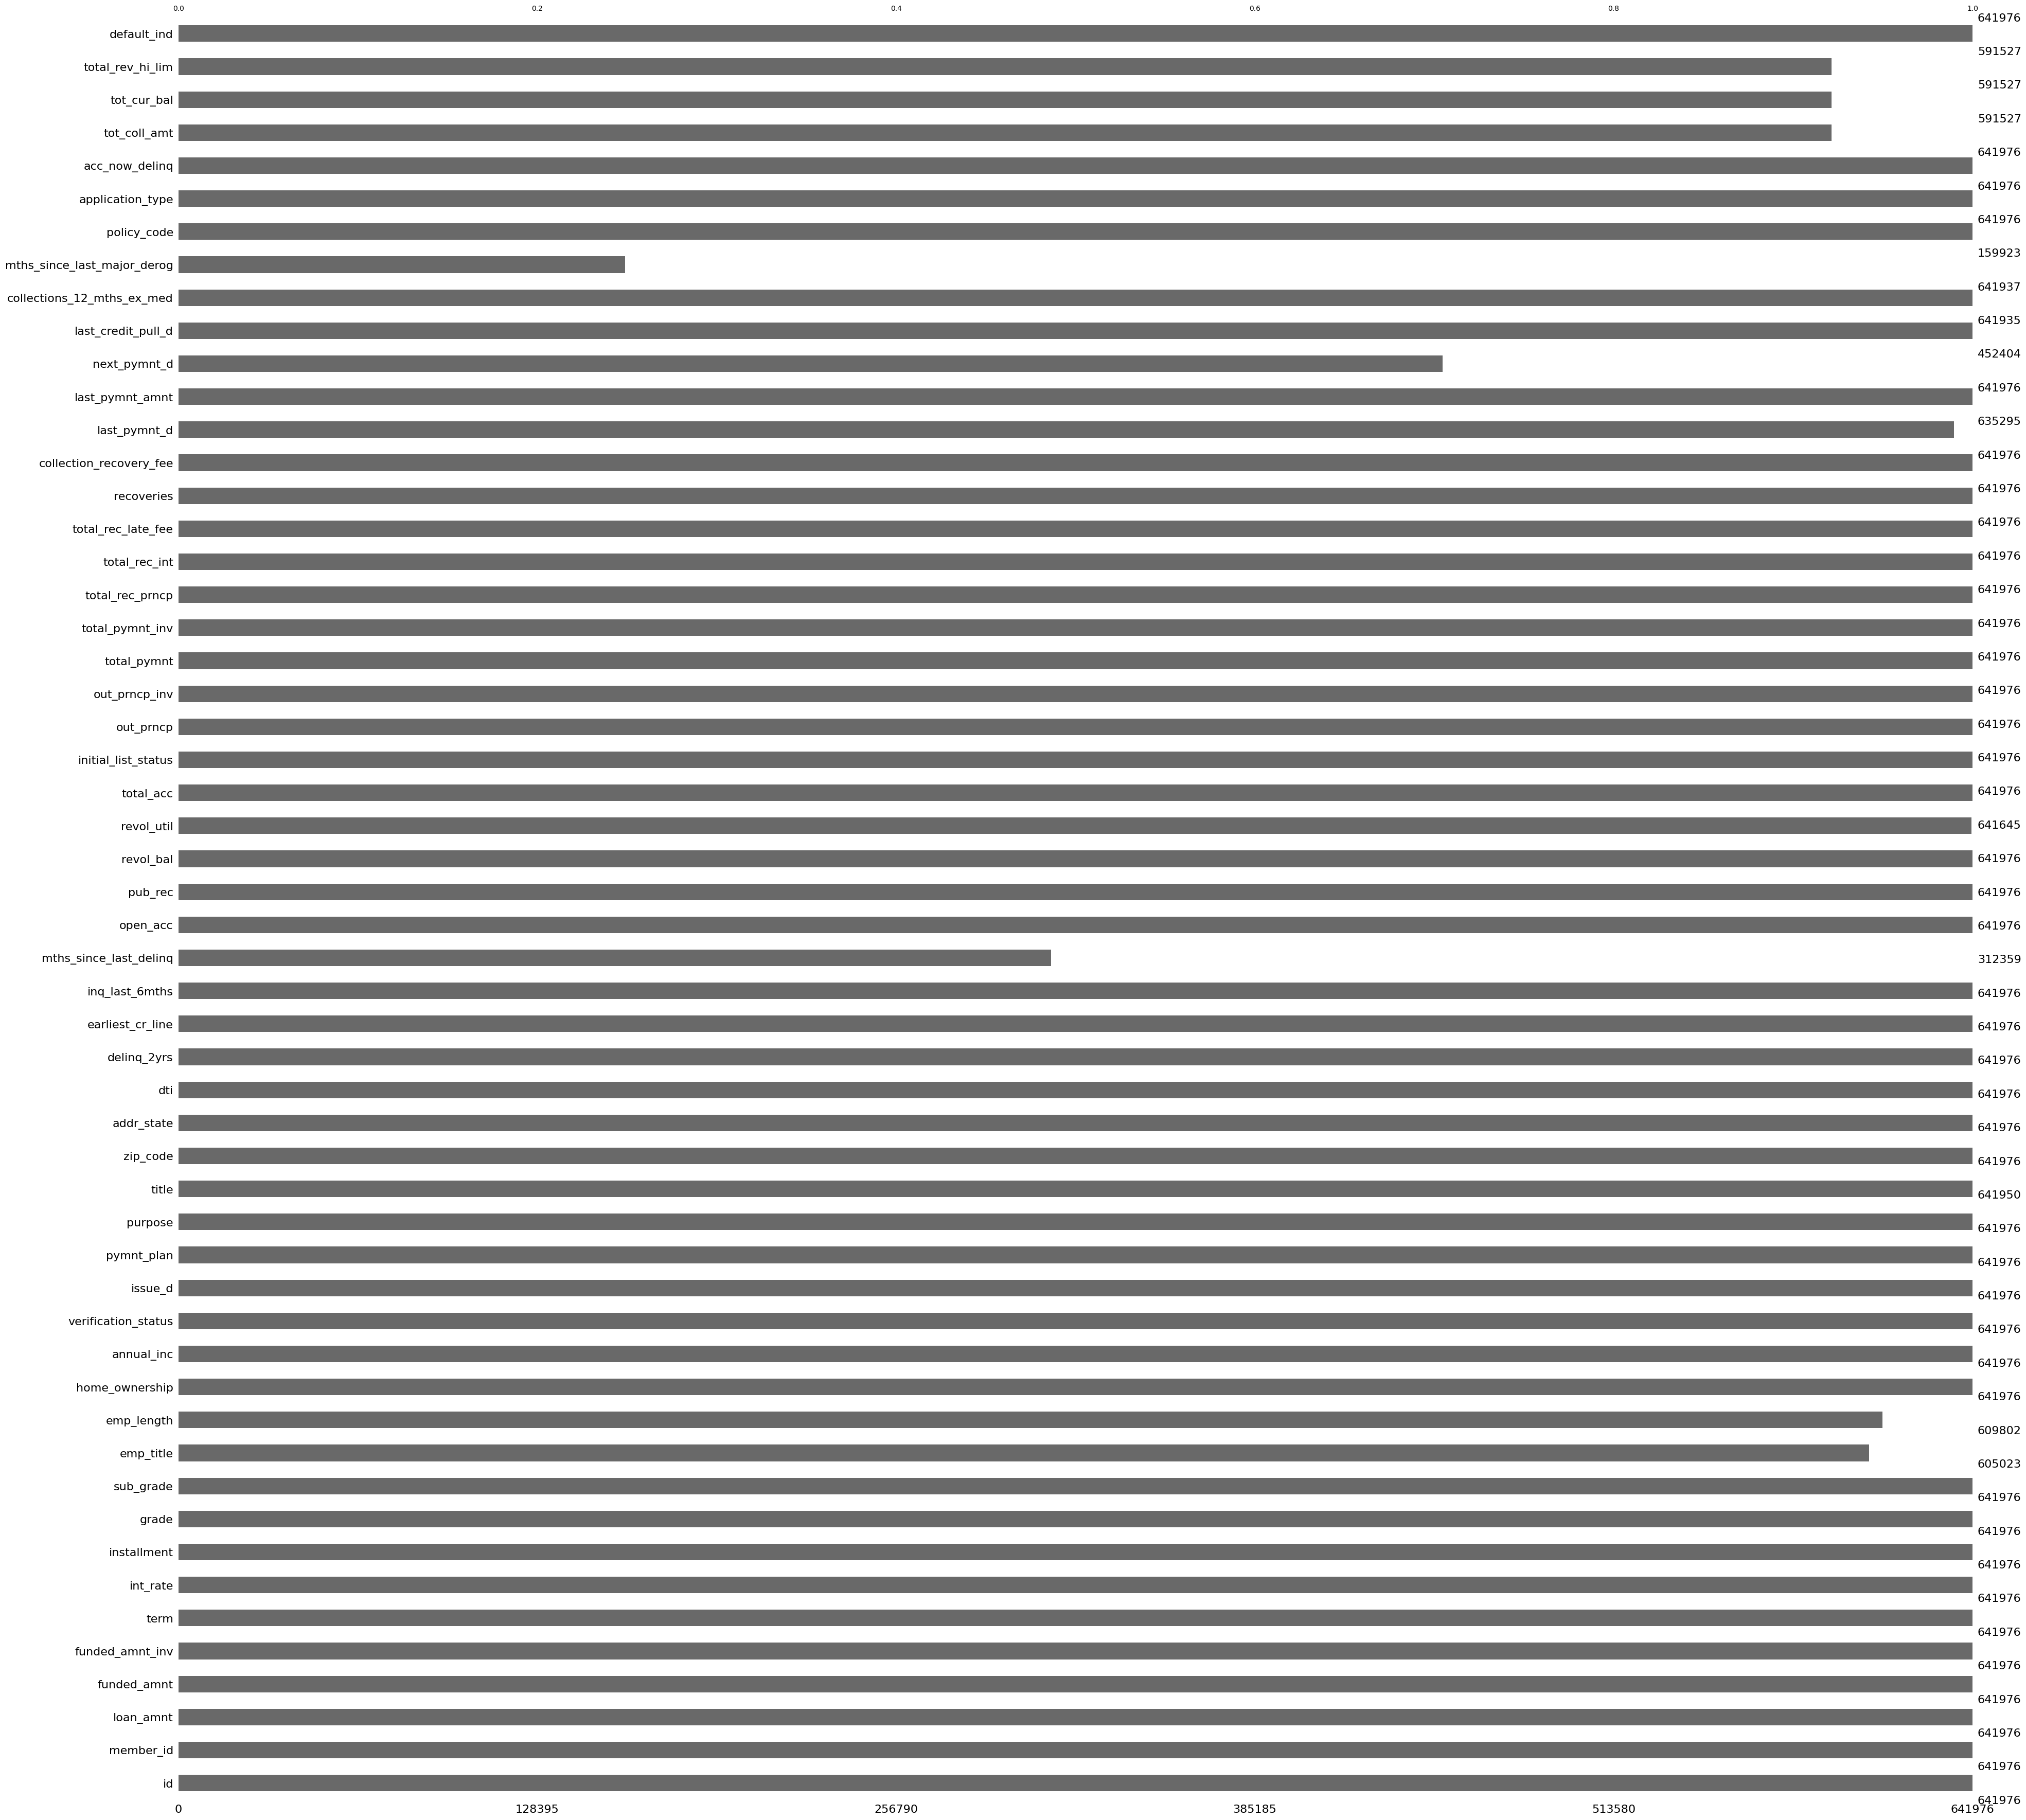

In [70]:
msno.bar(df_train,figsize=(45, 45))

# find catagorigal variables

In [71]:
df_train.select_dtypes(exclude=['int', 'float']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

# Visualize the Class Distribution: 

Class counts:
default_ind
0    607098
1     34878
Name: count, dtype: int64
Imbalance ratio: 0.05745036221499659


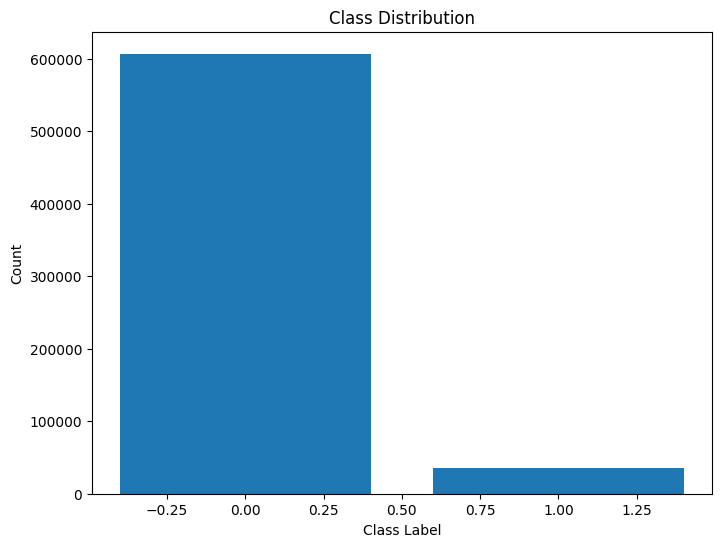

Severe class imbalance detected.


In [72]:
target_counts = df_train['default_ind'].value_counts()
imbalance_ratio = min(target_counts) / max(target_counts)
print("Class counts:")
print(target_counts)
print("Imbalance ratio:", imbalance_ratio)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Check if the imbalance is severe (e.g., less than 10% ratio)
if imbalance_ratio < 0.1:
    print("Severe class imbalance detected.")
else:
    print("Class distribution is balanced or moderately imbalanced.")

# outliers

In [73]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [74]:
df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,6.419760e+05,6.419760e+05,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,6.419760e+05,641976.000000,641976.000000,641976.000000,312359.000000,641976.000000,641976.000000,6.419760e+05,641645.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641976.000000,641937.000000,159923.000000,641976.0,641976.000000,591527.000000,5.915270e+05,5.915270e+05,641976.000000
mean,3.226535e+07,3.478900e+07,14749.354882,14736.050725,14703.391172,13.190561,436.316529,7.506444e+04,18.122662,0.312604,0.680290,34.132620,11.544031,0.194585,1.691961e+04,55.013602,25.259932,8292.640552,8289.249652,7647.787022,7616.417626,5845.506717,1754.641411,0.320872,47.318025,4.947521,2224.939482,0.014333,44.080364,1.0,0.004975,211.856142,1.397996e+05,3.219655e+04,0.054329
std,2.272414e+07,2.399869e+07,8419.608819,8413.635143,8420.248329,4.368078,243.514679,6.477900e+04,19.525031,0.858797,0.963973,21.866558,5.310854,0.583071,2.232177e+04,23.823893,11.809235,8461.388778,8457.940711,7903.316342,7878.954511,6671.155680,2082.458754,3.636388,413.910987,62.997359,4862.257906,0.132765,22.168224,0.0,0.077823,1876.423665,1.540822e+05,3.920009e+04,0.226666
min,5.473400e+04,7.082500e+04,500.000000,500.000000,0.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,9.077466e+06,1.080014e+07,8000.000000,8000.000000,8000.000000,9.990000,260.850000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,8.000000,0.000000,6.462000e+03,37.600000,17.000000,0.000000,0.000000,1967.930000,1957.947500,1237.857500,450.707500,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,0.000000,0.000000,2.985900e+04,1.400000e+04,0.000000
50%,3.434222e+07,3.699620e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.600000,0.000000,0.000000,31.000000,11.000000,0.000000,1.190900e+04,55.900000,24.000000,6304.030000,6301.250000,4974.890000,4947.370000,3284.580000,1076.480000,0.000000,0.000000,0.000000,468.590000,0.000000,44.000000,1.0,0.000000,0.000000,8.109100e+04,2.380000e+04,0.000000
75%,5.448399e+07,5.806417e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.890000,0.000000,1.000000,50.000000,14.000000,0.000000,2.087200e+04,73.500000,32.000000,13530.750000,13526.150000,10735.865000,10687.230000,8000.000000,2233.492500,0.000000,0.000000,0.000000,847.705000,0.000000,61.000000,1.0,0.000000,0.000000,2.089400e+05,4.000000e+04,0.000000
90%,6.271477e+07,6.702929e+07,27850.000000,27675.000000,27600.000000,18.920000,780.755000,1.250000e+05,29.530000,1.000000,2.000000,68.000000,18.000000,1.000000,3.351200e+04,86.700000,41.000000,20750.895000,20744.810000,18410.195000,18333.075000,15000.000000,4112.980000,0.000000,0.000000,0.000000,7503.240000,0.000000,73.000000,1.0,0.000000,159.000000,3.343174e+05,6.275840e+04,0.000000
95%,6.562174e+07,7.025435e+07,32000.000000,32000.000000,31975.000000,20.990000,903.350000,1.500000e+05,32.670000,2.000000,3.000000,74.000000,21.000000,1.000000,4.393400e+04,92.400000,47.000000,25154.972500,25141.710000,24210.077667,24112.427500,20000.000000,5869.737500,0.000000,0.000000,0.000000,13203.012500,0.000000,77.000000,1.0,0.000000,633.000000,4.251265e+05,8.340000e+04,1.000000
99%,6.733774e+07,7.213933e+07

## Basic model


##  Splitting the data into train and test

In [75]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

In [76]:

# Putting feature variable to X
X = df_train.drop(['default_ind'],axis=1)

# Putting response variable to y
y = df_train['default_ind']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=27)

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# y_train = lab_enc.fit_transform(y_train)
# print(y_train)
# sm = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [77]:

categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type']
# categorical_features_indices = [i for i, dtype in enumerate(data_types) if dtype == 'object' or dtype == 'str']
# print(categorical_features_indices)

for col in categorical_features:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')

In [78]:

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature = categorical_features, free_raw_data=False)

In [79]:
# Define the LightGBM parameters
params = {
   "boosting_type": "dart",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 1,
    "early_stopping_round":2,
    "num_threads": 8
    
}


# Train the model
gbm = lgb.train(params, train_data, num_boost_round=10, valid_sets=[test_data])



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 24353, number of negative: 425030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16450
[LightGBM] [Info] Number of data points in the train set: 449383, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054192 -> initscore=-2.859505
[LightGBM] [Info] Start training from score -2.859505


In [ ]:

categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type']
# categorical_features_indices = [i for i, dtype in enumerate(data_types) if dtype == 'object' or dtype == 'str']
# print(categorical_features_indices)

for col in categorical_features:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature = categorical_features, free_raw_data=False)
params = {
   "boosting_type": "dart",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 1,
    "early_stopping_round":2,
    "num_threads": 8
    
}


# Train the model
gbm = lgb.train(params, train_data, num_boost_round=10, valid_sets=[test_data])
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)            

In [80]:
print("Dumping and loading model with pickle...")
# dump model with pickle
with open("model.pkl", "wb") as fout:
    pickle.dump(gbm, fout)

Dumping and loading model with pickle...


In [81]:
# Make predictions
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 0.9996859182941071


In [82]:
y_pred

array([0.03540694, 0.03544864, 0.03544864, ..., 0.03556842, 0.03544864,
       0.08949827])

## Test Data

In [145]:
TEST_DATA_PATH = "/Users/bpakra200/AiEdge/AutoML/data/test.csv"

In [146]:
df_test = pd.read_csv(TEST_DATA_PATH)

In [147]:
df_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,65813345,70446097,16000,16000,16000.0,60 months,13.67,369.57,C,C4,Mailhandler,10+ years,MORTGAGE,55692.0,Verified,01-11-2015,n,NaN,debt_consolidation,Debt consolidation,275xx,NC,33.74,0,01-01-1996,0,NaN,55.0,12,1,13075,71.0,26,w,15812.7,15812.70,345.27000,345.27,187.3,157.97,0.0,0.0,0.0,01-12-2015,369.57,01-01-2016,01-01-2016,0.0,54.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,30289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18330.0,NaN,NaN,NaN
1,49883606,53252333,3600,3600,3575.0,36 months,9.17,114.77,B,B2,Branch Manager,10+ years,MORTGAGE,80000.0,Not Verified,01-05-2015,n,NaN,vacation,Vacation,431xx,OH,14.60,0,01-04-1989,0,42.0,NaN,13,0,6490,65.6,32,f,2975.0,2954.34,801.56000,795.99,625.0,176.56,0.0,0.0,0.0,01-12-2015,114.77,01-02-2016,01-01-2016,0.0,50.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,113622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9900.0,NaN,NaN,NaN
2,10170960,12022407,7000,7000,7000.0,36 months,7.62,218.13,A,A3,Teacher,10+ years,RENT,65000.0,Source Verified,01-01-2014,n,Borrower added on 01/03/14 > I am already fa...,debt_consolidation,Debt Consolidation,945xx,CA,18.34,1,01-10-1989,1,15.0,NaN,15,0,15036,24.2,26,f,0.0,0.00,7655.45992,7655.46,7000.0,655.46,0.0,0.0,0.0,01-08-2015,3730.20,NaN,01-08-2015,0.0,15.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,45234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62200.0,NaN,NaN,NaN
3,1145161,1385834,12000,12000,12000.0,36 months,6.03,365.23,A,A1,The University of North Carolina at Gree,10+ years,MORTGAGE,65000.0,Not Verified,01-02-2012,n,NaN,credit_card,Bank of America Credit Card Refinance,272xx,NC,13.18,0,01-06-1995,0,NaN,NaN,9,0,2191,6.6,27,f,0.0,0.00,13147.61333,13147.61,12000.0,1147.61,0.0,0.0,0.0,01-02-2015,369.12,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1280443,1523767,14000,14000,14000.0,36 months,16.29,494.21,C,C5,Merced County,9 years,MORTGAGE,161605.0,Verified,01-05-2012,n,NaN,debt_consolidation,CC Consolidation,953xx,CA,17.41,3,01-01-1990,2,15.0,NaN,19,0,30595,83.4,54,f,0.0,0.00,17793.78339,17793.78,14000.0,3793.78,0.0,0.0,0.0,01-07-2015,16.22,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df_test.drop(["desc","mths_since_last_record",
           "annual_inc_joint","dti_joint","verification_status_joint","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m"], axis = 1, inplace = True)

In [ ]:
df_test['default_ind']

In [150]:
X_Real_TEST = df_test

In [151]:
X_Real_TEST.shape

(213993, 53)

In [152]:

categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type']
# categorical_features_indices = [i for i, dtype in enumerate(data_types) if dtype == 'object' or dtype == 'str']
# print(categorical_features_indices)

for col in categorical_features:
            X_Real_TEST[col] = X_Real_TEST[col].astype('category')

In [153]:
X_Real_TEST.shape

(213993, 53)

In [154]:
y_real_pred = gbm.predict(X_Real_TEST, num_iteration=gbm.best_iteration)

In [156]:
y_real_pred

array([0.03544864, 0.03544864, 0.03556842, ..., 0.03556842, 0.03544864,
       0.03544864])

## sample_submission Data

In [157]:
df_predictions = pd.DataFrame({'id': X_Real_TEST['id'], 'prediction': y_real_pred})


In [158]:
df_predictions.shape

(213993, 2)

In [159]:
df_predictions.to_csv('predictions.csv', index=False)

## Use sklearn api to test


In [160]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [164]:
# Putting feature variable to X
X = df_train.drop(['default_ind'],axis=1)

# Putting response variable to y
y = df_train['default_ind']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=27)

In [165]:
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


In [167]:
X_train.shape

(449383, 53)

In [168]:
model = LGBMClassifier(boosting_type='dart',
                       objective='binary',
                       metric='binary_logloss',
                       num_leaves=31,
                       learning_rate=0.05,
                       feature_fraction=0.9,
                       bagging_fraction=0.8,
                       bagging_freq=5,
                       verbose=1,
                       early_stopping_rounds=2,
                       n_jobs=8)


In [169]:
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          categorical_feature=categorical_features)


[LightGBM] [Warning] early_stopping_round is set=2, early_stopping_rounds=2 will be ignored. Current value: early_stopping_round=2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytr

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, boosting_type='dart',
               early_stopping_rounds=2, feature_fraction=0.9,
               learning_rate=0.05, metric='binary_logloss', n_jobs=8,
               objective='binary', verbose=1)

In [170]:
y_pred_classifier = model.predict(X_test)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [171]:
y_pred_prob = model.predict_proba(X_test)[:, 1]


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [175]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.9999344480256573


## With Hyper param tuning 

In [178]:
from skopt import BayesSearchCV

In [193]:
param_space = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': (10, 100),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
    'reg_alpha': (0.0, 1.0, 'uniform'),
    'reg_lambda': (0.0, 1.0, 'uniform'),
    'bagging_fraction': (0.5, 1.0, 'uniform'),
   
}


In [194]:
search = BayesSearchCV(model,
                       param_space,
                       n_iter=50,
                       scoring='accuracy',
                       cv=5,
                       random_state=42)


In [188]:
model = LGBMClassifier(
                       objective='binary',
                       metric='binary_logloss',
                       feature_fraction=0.9,
                       bagging_freq=5,
                       verbose=1,
                       early_stopping_rounds=2,
                       n_jobs=8)

In [190]:
np.int = int
search.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          categorical_feature=categorical_features)


[LightGBM] [Warning] early_stopping_round is set=2, early_stopping_rounds=2 will be ignored. Current value: early_stopping_round=2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.966433999423917 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.705051979426657, subsample=0.8697521170952103 will be ignored. Current value: bagging_fraction=0.705051979426657
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.705051979426657, subsample=0.8697521170952103 will be ignored. Current value:

BayesSearchCV(cv=5,
              estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                       boosting_type='dart',
                                       early_stopping_rounds=2,
                                       feature_fraction=0.9,
                                       metric='binary_logloss', n_jobs=8,
                                       objective='binary', verbose=1),
              random_state=42, scoring='accuracy',
              search_spaces={'bagging_fraction': (0.5, 1.0, 'uniform'),
                             'boosting_type': ['gbdt', 'dart'],
                             'colsample_bytree': (0.5, 1.0, 'uniform'),
                             'learning_rate': (0.01, 0.1, 'log-uniform'),
                             'num_leaves': (10, 100),
                             'reg_alpha': (0.0, 1.0, 'uniform'),
                             'reg_lambda': (0.0, 1.0, 'uniform'),
                             'subsample': (0.5, 1.0, 'uniform')})

In [191]:
best_model = search.best_estimator_
best_score = search.best_score_


In [192]:
best_score

0.9995972256629138

In [195]:
df_train.select_dtypes(exclude=['int', 'float']).columns
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [196]:
def change_categorical_type(df):
    categorical_features = df.select_dtypes(exclude=['int', 'float']).columns
    
    for col in categorical_features:
        df[col] = df[col].astype('category')
    
    return df


In [197]:
df_train = change_categorical_type(df_train)